In [ ]:
!pip install ultralytics opencv-python numpy


In [4]:
from ultralytics import YOLO
import cv2
from PIL import Image
from IPython.display import display, clear_output

In [5]:
# Load model
model = YOLO("yolov8n.pt")  # or yolov8s.pt
model.to("cpu")

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

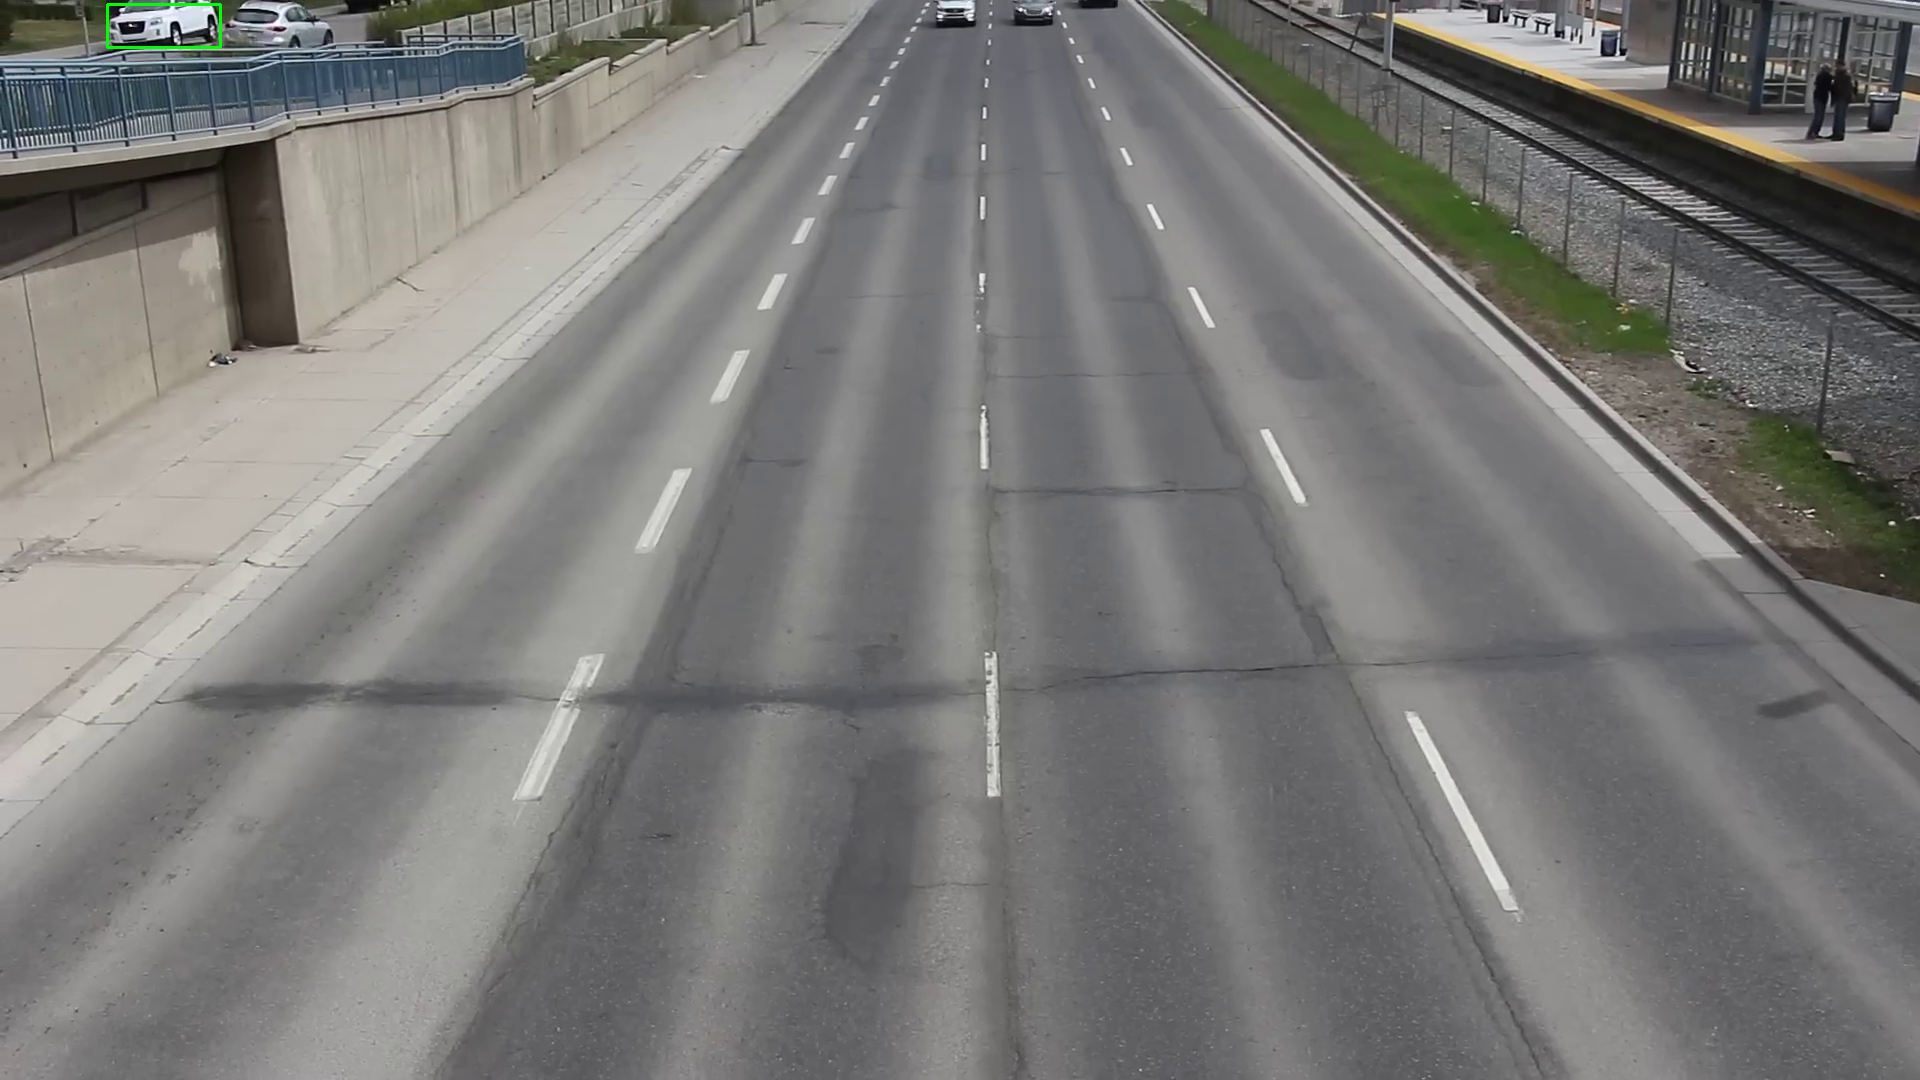

✅ Done. Total detections across 100 frames: 67


In [6]:
video_path = "sample_video.mp4"
cap = cv2.VideoCapture(video_path)

vehicle_classes = [2, 3, 5, 7]  # car, motorcycle, bus, truck
frame_count = 0
total_vehicle_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Predict using YOLO (no tracking)
    results = model.predict(frame, verbose=False)[0]

    # Filter vehicle detections
    vehicle_detections = [box for box in results.boxes if int(box.cls) in vehicle_classes]
    total_vehicle_count += len(vehicle_detections)

    # Annotate frame (optional)
    for box in vehicle_detections:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        cls = int(box.cls)
        label = model.names[cls]
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0,255,0), 2)
        cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)

    # Preview (optional, can comment this to go faster)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    clear_output(wait=True)
    display(Image.fromarray(frame_rgb))

    frame_count += 1
    if frame_count >= 100:  # Limit for safety
        break

cap.release()

print(f"✅ Done. Total detections across {frame_count} frames: {total_vehicle_count}")